In [80]:
import pandas as pd
import numpy as np

In [64]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [69]:
df.shape

(150, 6)

In [71]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [73]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [75]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [77]:
df_object_columns = df.select_dtypes(include='object')
print(df_object_columns)

            Species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

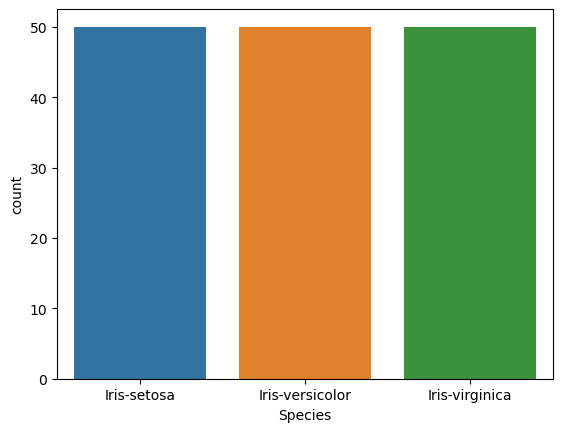

In [83]:
sns.countplot(x='Species', data=df)
plt.show()

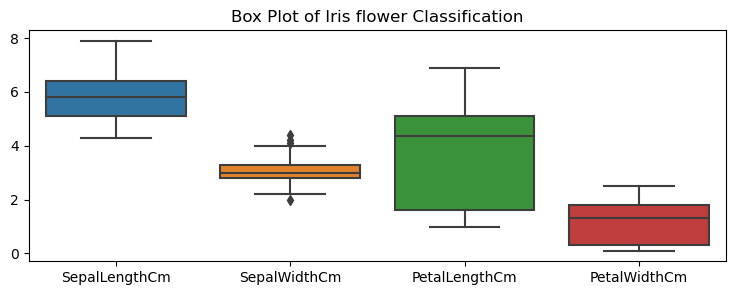

In [84]:
plt.figure(figsize=(9,3))
sns.boxplot(df)

# Adding title and labels
plt.title("Box Plot of Iris flower Classification")
plt.show()

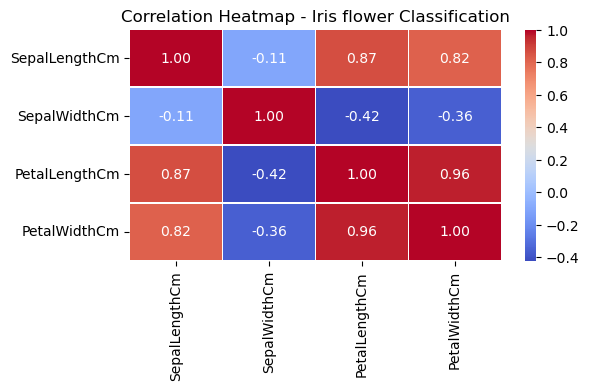

In [85]:
numerical_df = df.select_dtypes(include=['float64'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(6, 3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Iris flower Classification")
plt.show()

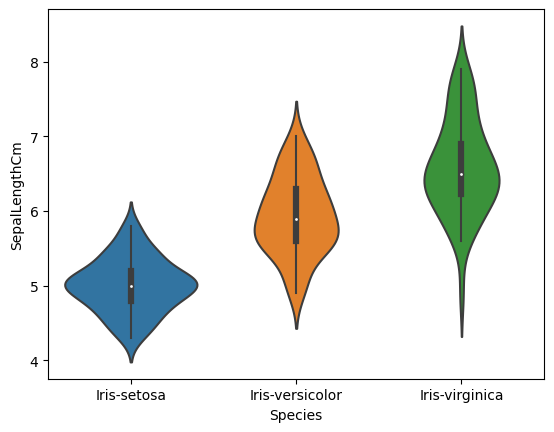

In [86]:
sns.violinplot(x='Species', y='SepalLengthCm', data=df)

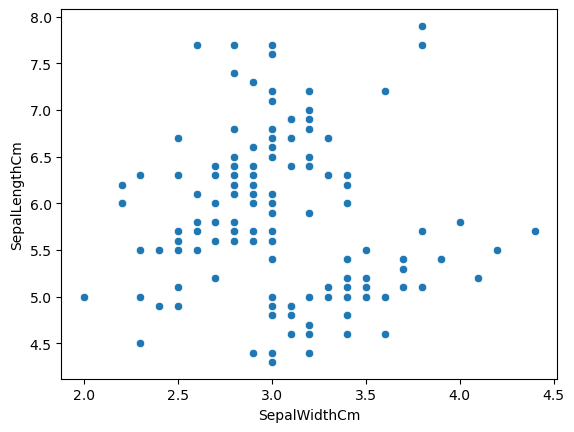

In [87]:
sns.scatterplot(x='SepalWidthCm',y='SepalLengthCm',data=df)
plt.show()

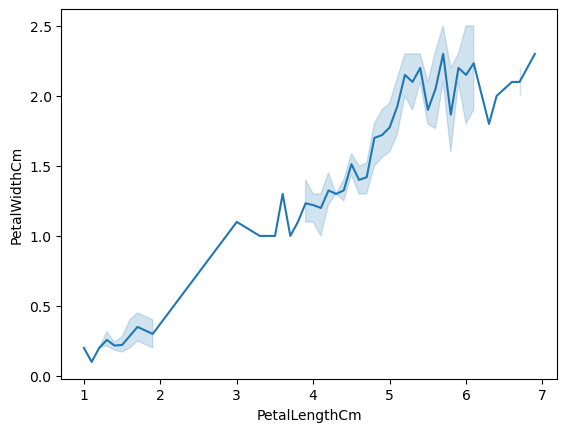

In [88]:
sns.lineplot(x='PetalLengthCm',y='PetalWidthCm',data=df)
plt.show()

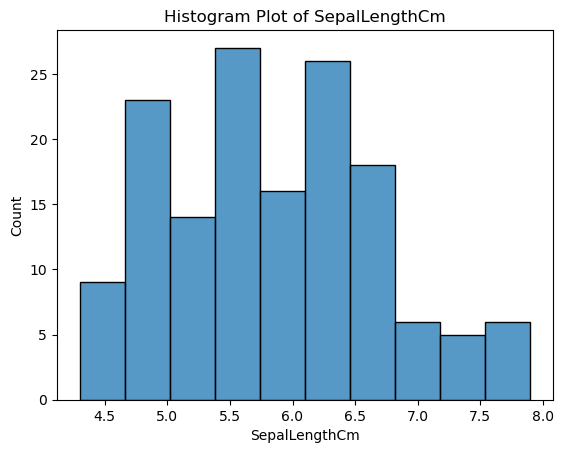

In [89]:
sns.histplot(df['SepalLengthCm'],bins=10)
plt.title('Histogram Plot of SepalLengthCm')
plt.show()

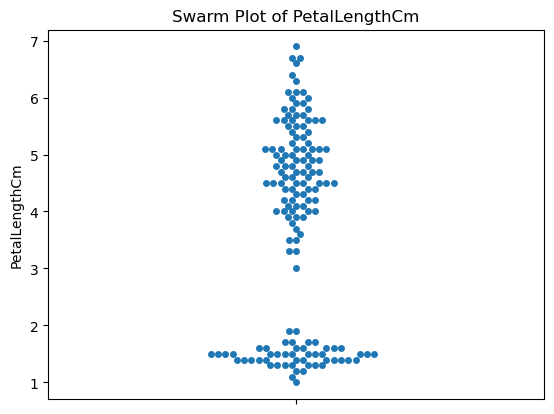

In [90]:
sns.swarmplot(y='PetalLengthCm',data=df)
plt.title('Swarm Plot of PetalLengthCm')
plt.show()

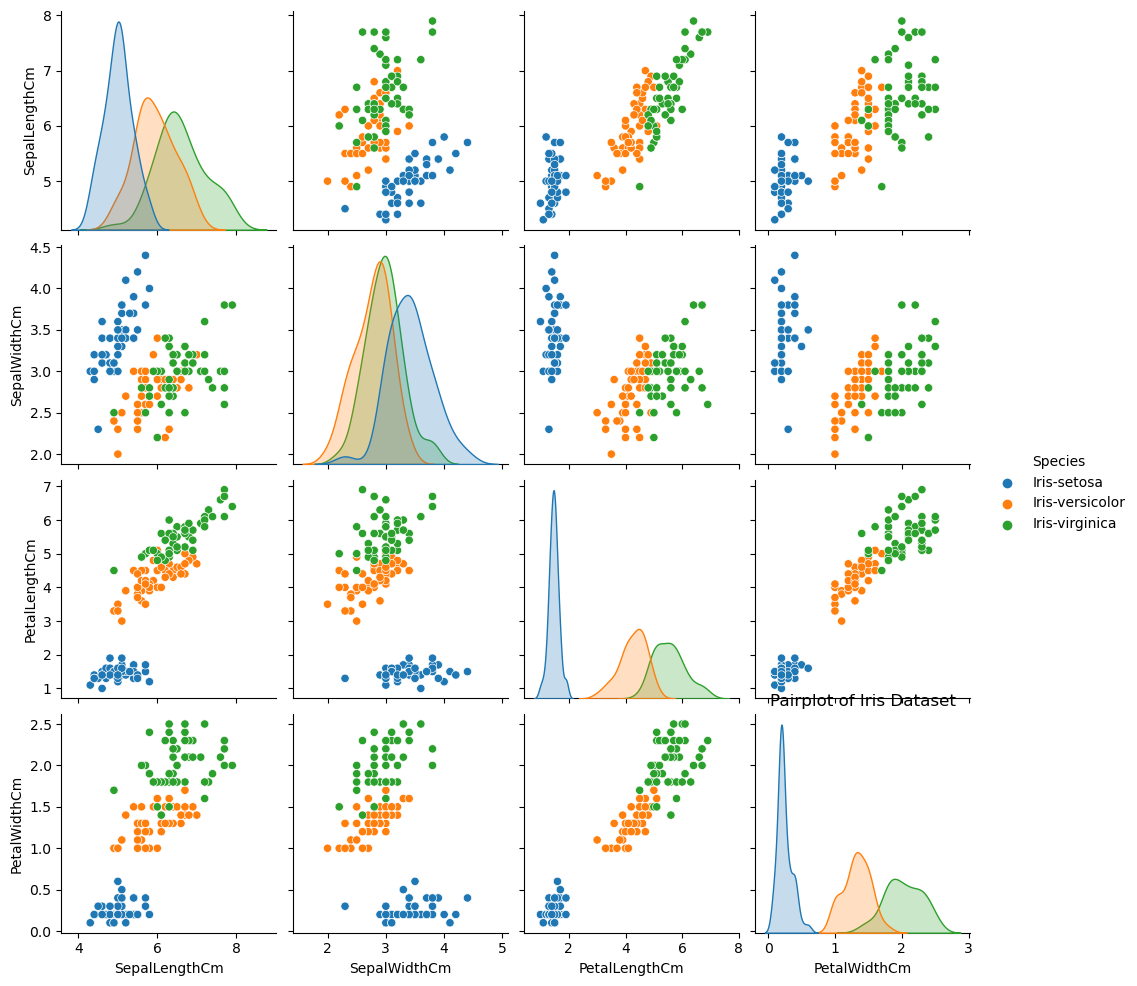

In [91]:
sns.pairplot(df, hue='Species')
plt.title('Pairplot of Iris Dataset')
plt.show()

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

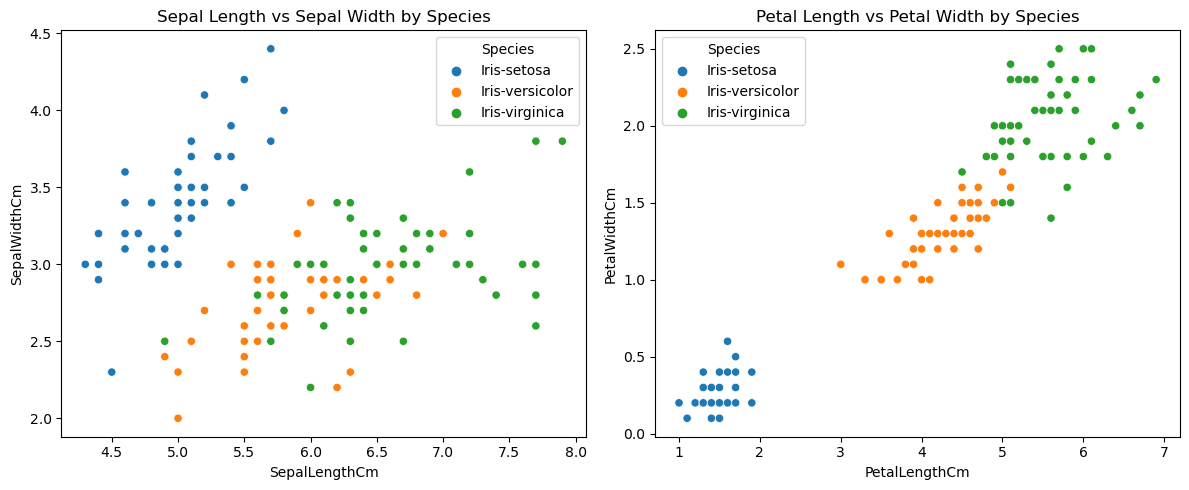

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, ax=axes[0])
axes[0].set_title('Sepal Length vs Sepal Width by Species')

sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df, ax=axes[1])
axes[1].set_title('Petal Length vs Petal Width by Species')

plt.tight_layout()
plt.show()

In [100]:
labels = LabelEncoder()
df['Species'] = labels.fit_transform(df['Species'])
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [102]:
y_pred = model.predict(X_test)

In [104]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [107]:
sample_input = np.array([[5.1, 3.5, 1.4, 0.2]])
sample_input = sample_input.reshape(1, -1)
predicted_class = model.predict(sample_input)

if predicted_class[0] == 0:
    print("Predicted Species: Setosa")
elif predicted_class[0] == 1:
    print("Predicted Species: Versicolor")
elif predicted_class[0] == 2:
    print("Predicted Species: Virginica")

Predicted Species: Setosa


c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
